In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, average_precision_score, recall_score,roc_curve, roc_auc_score, precision_recall_curve,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

## FUNCIONES PARA LIMPIEZA DE DATOS 

In [3]:
def leer_dataframe(ruta):
    return pd.read_csv(ruta)
#eliminar valores nulos
def drop_null(dataframe, axis = 0):
    return dataframe.dropna(axis= axis )
## rellenar los valores que son nulos con 0
def replace(dataframe):
    return dataframe.fillna(0)
# funcion para eliminar los valores atipicos con usando el criterio IQR
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]


In [4]:
data = leer_dataframe("../Prueba-apoyo/cardio.csv")
data.head()


,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
#vemos que tipos de datos hay en el dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB
N

In [6]:
#vemos y sumamos cuantos valores son nulos
print(data.isnull().sum())

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [7]:
data_clean = drop_null(data)

In [8]:
#vemos y sumamos cuantos valores son nulos
print(data_clean.isnull().sum())

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### <span style="color:red">Para las variables cuantitativas vamos a escoger 3 variables cuantitativas: Edad, Nivel de colesterol total y Presión arterial sistólica</span>

#### para esto le haremos estudios de analisis descriptivo en la que calcularemos la media, mediana, desviacion estandar, rango y varianza para seguir haciendo el estudo de las varibles seleccionadas 

In [9]:
datos_descriptivos = data_clean[["age","totChol", "sysBP"]].describe()
print(datos_descriptivos)

               age      totChol        sysBP
count  3656.000000  3656.000000  3656.000000
mean     49.557440   236.873085   132.368025
std       8.561133    44.096223    22.092444
min      32.000000   113.000000    83.500000
25%      42.000000   206.000000   117.000000
50%      49.000000   234.000000   128.000000
75%      56.000000   263.250000   144.000000
max      70.000000   600.000000   295.000000


La variable presenta mayor dispersión, debemos observar el valor de desviación estándar (std):

Colesterol Total tiene la mayor desviación estándar con un valor de 44.09.
Presión Arterial le sigue con 22.09.
Edad tiene la menor dispersión con 8.57.

Conclusión:
La variable que presenta mayor dispersión es el Colesterol Total.

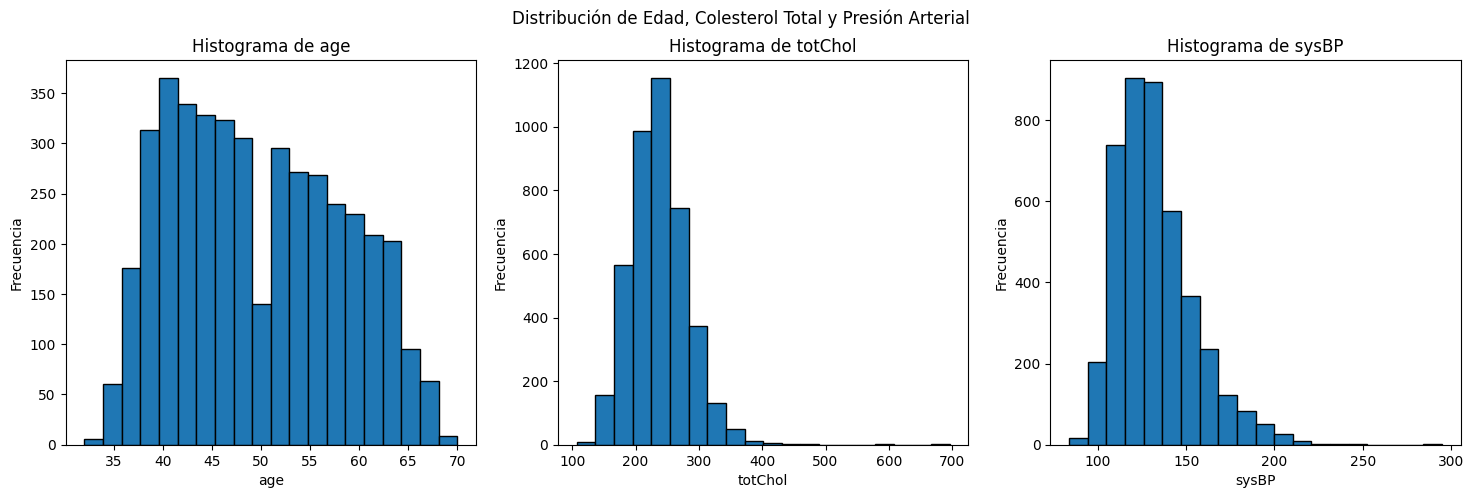

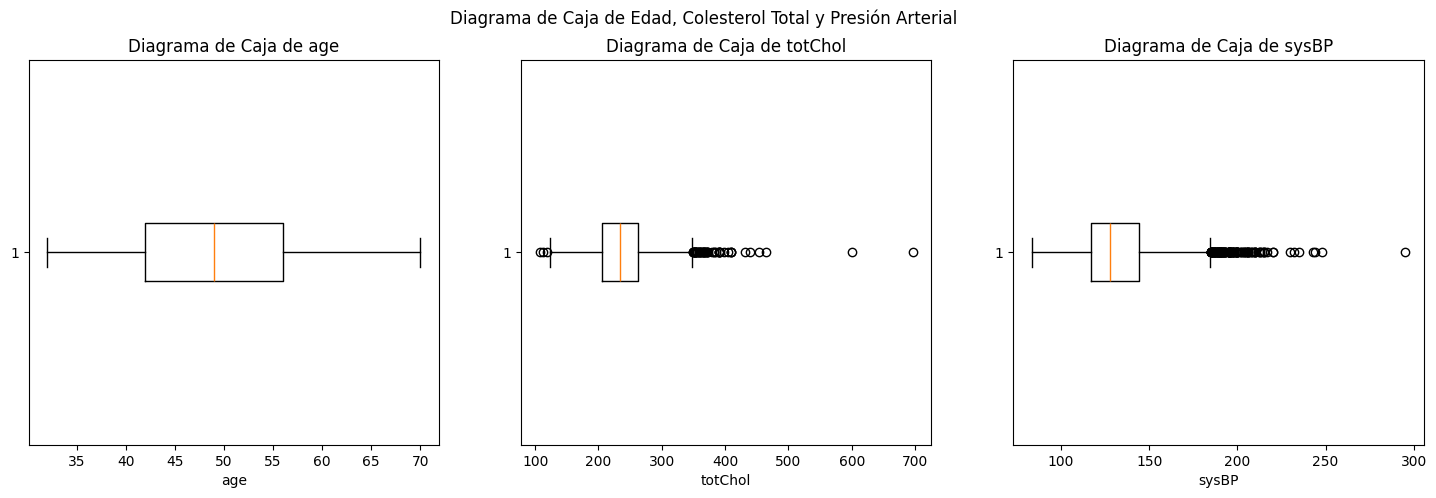

In [10]:
# Crear histogramas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Distribución de Edad, Colesterol Total y Presión Arterial")

for i, var in enumerate(["age","totChol", "sysBP"]):
    axes[i].hist(data[var].dropna(), bins=20, edgecolor='black')
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.show()

# Crear diagramas de caja (box plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Diagrama de Caja de Edad, Colesterol Total y Presión Arterial")

for i, var in enumerate(["age","totChol", "sysBP"]):
    axes[i].boxplot(data[var].dropna(), vert=False)
    axes[i].set_title(f'Diagrama de Caja de {var}')
    axes[i].set_xlabel(var)

plt.show()

#### Interpretación de los Histogramas

*Edad (age):* La distribución es bimodal, con picos alrededor de los 40 y 50 años.
La dispersión parece menor en comparación con las otras variables, ya que los valores están concentrados en un rango específico.

*Colesterol Total (totChol):* La distribución es asimétrica hacia la derecha, con una mayoría de valores entre 200 y 300, pero algunos valores más altos hasta 700.
Esta asimetría indica una mayor dispersión, especialmente en los valores extremos.

*Presión Arterial Sistólica (sysBP):* También muestra una asimetría hacia la derecha, concentrándose entre 110 y 160, con algunos valores extremos que se extienden hasta los 295.
La dispersión es notable, pero no tan amplia como en el colesterol total.

#### Interpretación de los Diagramas de Caja (Box Plots)

Edad: Los valores están concentrados y no presentan valores atípicos extremos; la dispersión es baja.

Colesterol Total: Muestra varios valores atípicos a la derecha, lo cual indica una mayor dispersión. Esto coincide con el valor alto de desviación estándar que calculamos.

Presión Arterial: También tiene varios valores atípicos, pero no tan extremos como el colesterol.


In [11]:
# Lista de columnas cuantitativas
columnas_cuantitativas = ['age', 'BMI', 'glucose', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'cigsPerDay']


# Bucle para eliminar outliers de forma iterativa hasta que ya no haya cambios en la cantidad de filas
prev_row_count = 0
current_row_count = data_clean.shape[0]

while current_row_count != prev_row_count:
    prev_row_count = current_row_count
    for col in columnas_cuantitativas:
        data_clean = remove_outliers(data_clean, col)
    current_row_count = data_clean.shape[0]

#cabe recarlcar que utilizamos el dataframe data_clean ya que en ese data frame ya tenemos los nulos eliminados

# Verificar la cantidad de valores después de la limpieza
print(f"Cantidad de valores después de eliminar atípicos: {data_clean.shape[0]}")
# Crear una co




Cantidad de valores después de eliminar atípicos: 2970


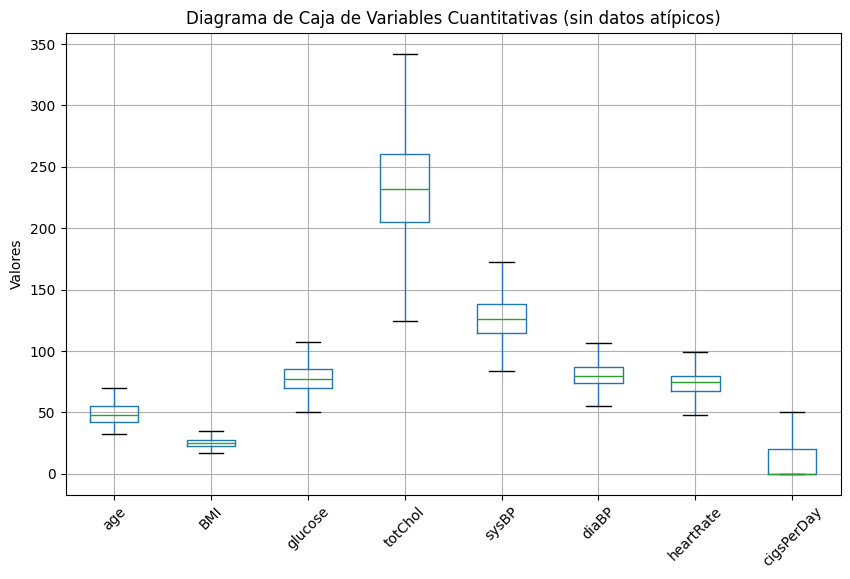

In [12]:
import matplotlib.pyplot as plt


# Crear diagramas de caja para cada variable en data_clean
plt.figure(figsize=(10,6))
data_clean[columnas_cuantitativas].boxplot()
plt.title("Diagrama de Caja de Variables Cuantitativas (sin datos atípicos)")
plt.ylabel("Valores")
plt.xticks(rotation=45)  # Rotación de etiquetas para mejor visibilidad
plt.show()


En este grafico podemos ver como efectivamente no existe ningun dato atipico ni fuerda de rango 

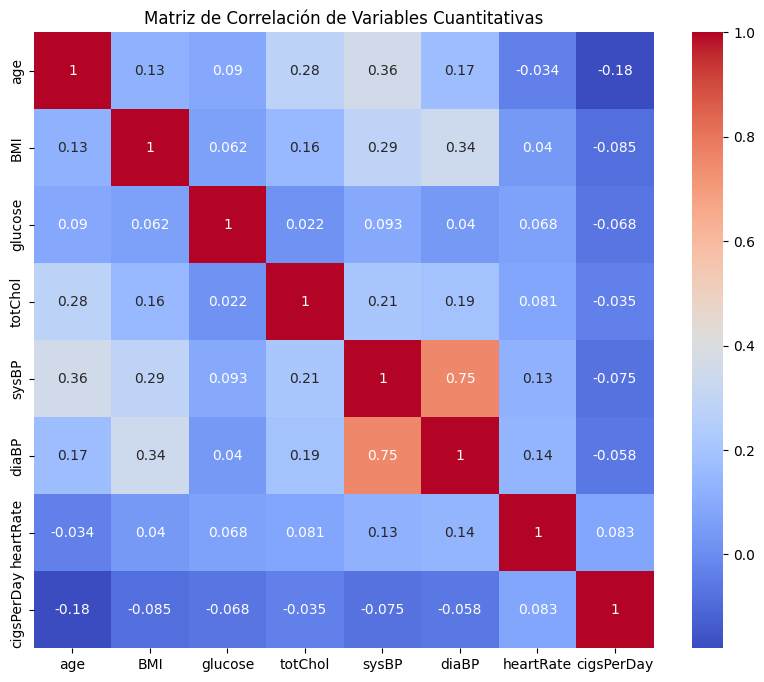

In [13]:
#4 ¿Qué variables cuantitativas presentan mayor correlación?
# Calcular la matriz de correlación para las variables cuantitativas
correlacion= data_clean[columnas_cuantitativas].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Variables Cuantitativas")
plt.show()


sysBP y diaBP: 0.75
La presión arterial sistólica y diastólica están fuertemente correlacionadas, lo cual es esperado ya que ambas son medidas relacionadas de la presión arterial.

BMI y diaBP: 0.34
El índice de masa corporal (BMI) tiene una correlación moderada con la presión arterial diastólica. Esto podría indicar que un mayor BMI está asociado a un aumento en la presión diastólica, posiblemente relacionado con el riesgo cardiovascular.

BMI y sysBP: 0.29 (casi 0.30)
Similar a la relación con diaBP, un mayor BMI tiende a asociarse con un aumento en la presión sistólica, aunque la relación es algo menor.

age y sysBP: 0.36
La edad tiene una correlación moderada con la presión arterial sistólica, indicando que, generalmente, la presión sistólica aumenta con la edad.

age y diaBP: 0.17 
A medida que aumenta la edad, hay una ligera tendencia al aumento de la presión diastólica, aunque la relación no es muy fuerte.

In [14]:
# pregunta numero 5: Si de este dataset se escoge un paciente alazar,¿cuál es la probabilidad de que sea
#hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al
#índicedemasacorporal?


# Calcular el tercer cuartil (Q3) del BMI
mayor_cuartil = data_clean['BMI'].quantile(0.75)

# Filtrar el dataset para el cuartil superior de BMI
cuartil_superior_BMI = data_clean[data_clean['BMI'] >= mayor_cuartil ]

# Calcular la probabilidad de que sea hombre dentro del cuartil superior de BMI
prob_hombre = cuartil_superior_BMI[cuartil_superior_BMI['sex'] == 'M'].shape[0] / cuartil_superior_BMI.shape[0]

# Mostrar el resultado
print(f"La probabilidad de que un paciente sea hombre, dado que está en el cuartil superior de BMI, es: {prob_hombre:.2f}")


La probabilidad de que un paciente sea hombre, dado que está en el cuartil superior de BMI, es: 0.54


In [15]:
#Pregunta 6: ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro
#deldataset),su ritmo cardiaco promedio es 75? Explica y justifica

promedio_ritmo = data_clean['heartRate'].mean()
desviacion_ritmo = data_clean['heartRate'].std()
print(f"El promedio del ritmo cardiaco es de {promedio_ritmo:.2f}")
print(f"La desviacion estandar de los datos es de {desviacion_ritmo:.2f}")

El promedio del ritmo cardiaco es de 73.87
La desviacion estandar de los datos es de 10.06


Explicacion y justificacion 


### Explicación
El ritmo cardíaco promedio en mi dataset es **73.87**. Este valor representa la media del ritmo cardíaco en mi muestra de datos, después de eliminar los valores atípicos. Dado que **75** está muy cerca de ese promedio, podemos considerar que es un valor razonable para el ritmo cardíaco de una persona promedio.

### Justificación
La **desviación estándar** de 10.06 nos indica que la mayoría de los ritmos cardíacos en el dataset varían dentro de un rango de aproximadamente 10 latidos por minuto alrededor del promedio. Esto significa que la mayoría de los valores de ritmo cardíaco en el dataset están entre 64 y 84 latidos por minuto (73.87 ± 10.06). Dado que **75** cae dentro de este rango típico de variación, es razonable usarlo como una estimación representativa del ritmo cardíaco promedio de una persona cualquiera.

En conclusión, Decir que el promedio de una persona son **75** latidos por minuto es una suposición razonable y respaldada por los datos de mi muestra, ya que está muy cerca del promedio y dentro del rango normal de variación.

In [20]:
#Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los
#pacientes fumadores?Explica

# primero tenemos que separar los fumadores del dataframe
fumadores = data_clean[(data_clean['currentSmoker'] == 'Yes') &  data_clean['cigsPerDay']]

#ahora vamos a separarlo entre mujeres y hombres
fumadores_Hombres = fumadores[(fumadores['sex'])== 'M']['cigsPerDay']
fumadores_Mujeres = fumadores[(fumadores['sex'])== 'F']['cigsPerDay']

promedio_hombres = fumadores_Hombres.mean()
promedio_mujeres = fumadores_Mujeres.mean()

print(f"El primedio de los cigarrillos que se fuman los hombres diario es de {promedio_hombres:.2f}")
print(f"El promedio de los cigarrillos que se fuman las mujeres diario es de {promedio_mujeres:.2f}")

t_stat, p_valor = stats.ttest_ind(fumadores_Hombres,fumadores_Mujeres,equal_var=False)

print(t_stat)
print(p_valor)

El primedio de los cigarrillos que se fuman los hombres diario es de 21.79
El promedio de los cigarrillos que se fuman las mujeres diario es de 14.06
15.867008520572131
1.8407627112844176e-52


Los hombres fumadores fuman en promedio unos 21 cigarrillos por día, mientras que las mujeres fumadoras fuman alrededor de 14 cigarrillos por día. Esta diferencia en el consumo promedio es notable.

Para obtener estos resultados, realizamos una limpieza exhaustiva del dataset, eliminando los valores atípicos que podrían sesgar el análisis. Esta limpieza asegura que los resultados sean más representativos de la tendencia central y no estén influenciados por personas con consumos de cigarrillos extremadamente altos.

Estadístico t: El valor obtenido (15.87) mide la diferencia entre los promedios de hombres y mujeres. Un valor alto como este indica que la diferencia entre ambos grupos es significativa.

P-valor: El p-valor extremadamente bajo (1.84e-52) sugiere que la diferencia observada es altamente significativa, y es muy improbable que esta diferencia ocurra por casualidad.

En conclusión, sí, ser hombre influye en el promedio de cigarrillos consumidos por día entre los pacientes fumadores. La limpieza de datos confirma que los hombres, en promedio, tienden a fumar más cigarrillos al día que las mujeres, y esta diferencia es estadísticamente significativa y no una coincidencia. La limpieza del dataset nos proporciona una visión más precisa y confiable de esta tendencia.

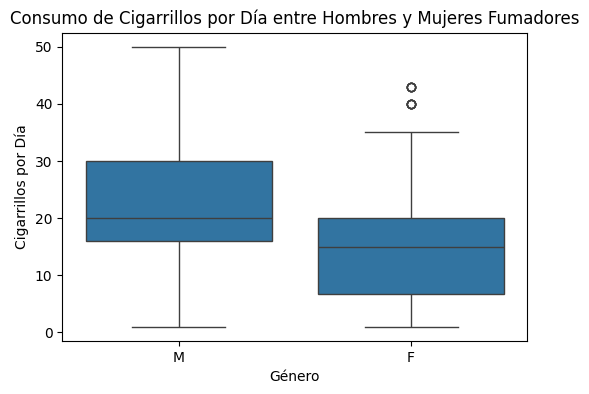

In [23]:
# Crear un box plot para comparar hombres y mujeres fumadores
plt.figure(figsize=(6, 4))
sns.boxplot(x=fumadores['sex'], y=fumadores['cigsPerDay'])
plt.title("Consumo de Cigarrillos por Día entre Hombres y Mujeres Fumadores")
plt.xlabel("Género")
plt.ylabel("Cigarrillos por Día")
plt.show()


Observaciones del Gráfico:

Distribución del Consumo:

Los hombres fumadores tienen un rango de consumo que es consistentemente más alto que el de las mujeres fumadoras.
La mediana (línea dentro de la caja) de los hombres es notablemente mayor que la de las mujeres, lo cual visualmente confirma que, en promedio, los hombres consumen más cigarrillos por día.

In [40]:
# Construye un modelo de regresión lineal que permita relacionar 6 variables del
# dataset con el índice de masa corporal. (Debes incluir al menos dos variables
# cualitativas).Evalúa tu modelo y explica.

# Seleccionamos las variables a trabajar
# Variables cuantitativas: age, glucose, totChol, heartRate
# Variables cualitativas: sex, currentSmoker
X = data_clean[['age', 'glucose', 'totChol', 'heartRate', 'sex', 'currentSmoker']]
y = data_clean['BMI']

# Convertir variables cualitativas a variables dummy (one-hot encoding)
X = pd.get_dummies(X, columns=['sex', 'currentSmoker'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y ajustar el modelo de regresión lineal3
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R-cuadrado (R²): {r2}")


Error Cuadrático Medio (MSE): 9.942077130468713
R-cuadrado (R²): 0.10387937146267456


---

### Interpretación del Modelo de Regresión Lineal para el Índice de Masa Corporal (BMI)

**Error Cuadrático Medio (MSE)**: El MSE es de **9.94**, lo que indica que, en promedio, el error de nuestras predicciones sobre el índice de masa corporal (BMI) es de aproximadamente 9.94 unidades cuadradas. En general, un valor más bajo de MSE indica un modelo mejor, pero este valor sugiere que el modelo aún tiene un margen de error considerable en las predicciones.

**Coeficiente de Determinación (R²)**: El valor de R² es de **0.10**, lo que significa que el modelo logra explicar solo el 10.4% de la variación en el índice de masa corporal entre los pacientes. Esto sugiere que el modelo es bastante limitado para predecir el BMI basándose en las variables seleccionadas, y que otros factores podrían estar influyendo en el BMI.

**Coeficientes de las Variables**:
Cada uno de los coeficientes asociados a una variable indica cuánto cambia el BMI por cada unidad de cambio en esa variable, manteniendo constante el resto de las variables. A continuación, se muestran algunas interpretaciones:

- **Edad (`age`)**: El coeficiente es positivo, lo cual sugiere que, en promedio, a medida que aumenta la edad, el BMI también tiende a aumentar ligeramente.
- **Frecuencia cardíaca (`heartRate`)**: Tiene un coeficiente positivo, lo que implica que un mayor ritmo cardíaco podría estar asociado a un aumento en el BMI, aunque el impacto es pequeño.
- **Presión diastólica (`diaBP`)**: Con un coeficiente positivo, sugiere que la presión arterial diastólica tiene un impacto moderado en el BMI, pero aún no es un factor determinante.
- **Medicamentos para la presión arterial (`BPMeds`)**: Un coeficiente positivo indica que, en promedio, las personas que toman estos medicamentos tienden a tener un BMI ligeramente más alto.
- **Género masculino (`sex_M`)**: El coeficiente positivo sugiere que los hombres tienen un BMI un poco más alto que las mujeres.
- **Fumar actualmente (`currentSmoker_Yes`)**: Su coeficiente es negativo, lo que sugiere que, en promedio, los fumadores tienden a tener un BMI más bajo en comparación con los no fumadores.

### Conclusión
Este modelo de regresión lineal no predice el BMI con gran precisión, dado el bajo valor de R² y el MSE relativamente alto. Esto indica que el BMI probablemente depende de otras variables no incluidas en el modelo o de factores individuales específicos que no se encuentran en estos datos. Para mejorar el modelo, sería necesario incluir más variables relevantes o considerar otros enfoques de modelado.



Balanceo antes de SMOTE:
 TenYearCHD
0    2589
1     381
Name: count, dtype: int64

Balanceo después de SMOTE:
 TenYearCHD
0    2589
1    2589
Name: count, dtype: int64

Exactitud (Accuracy): 0.6904761904761905
Precisión (Precision): 0.6738868832731648
Sensibilidad (Recall): 0.7272727272727273

Matriz de Confusión:
 [[513 271]
 [210 560]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       784
           1       0.67      0.73      0.70       770

    accuracy                           0.69      1554
   macro avg       0.69      0.69      0.69      1554
weighted avg       0.69      0.69      0.69      1554


AUC-ROC: 0.7468807977736549
AUC-PR: 0.700061044769526


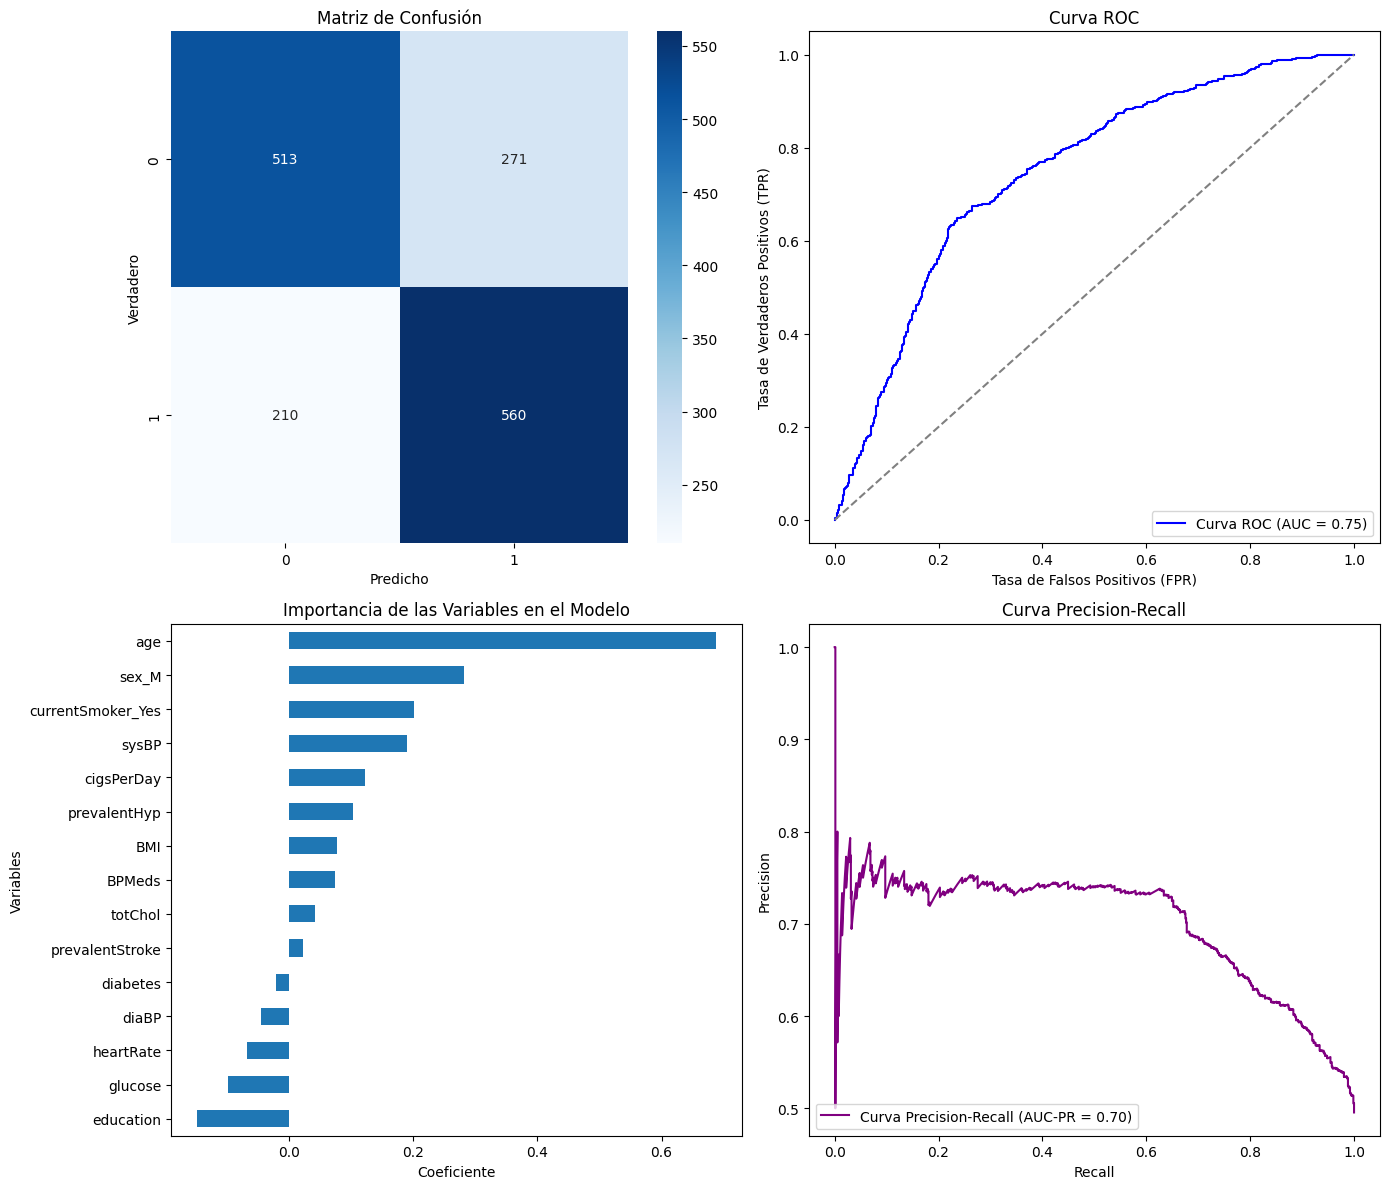

In [ ]:


# Contar los valores en la columna TenYearCHD para ver si aplicamos balanceo
balanceo = data_clean['TenYearCHD'].value_counts()
print("Balanceo antes de SMOTE:\n", balanceo)

# Separar variables independientes X y dependiente y
X = data_clean.drop(columns=["TenYearCHD"])
y = data_clean['TenYearCHD']

# Convertir variables categóricas en binarias usando pd.get_dummies
X = pd.get_dummies(X, columns=['sex', 'currentSmoker'], drop_first=True)

# Imputar valores faltantes
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verificar el balanceo después de SMOTE
print("\nBalanceo después de SMOTE:\n", pd.Series(y_res).value_counts())

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajustar el modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilidad para la clase positiva (1)

# Cálculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Cálculo del AUC-ROC y AUC-PR
auc_roc = roc_auc_score(y_test, y_proba)
auc_pr = average_precision_score(y_test, y_proba)

print("\nExactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Sensibilidad (Recall):", recall)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", classification_rep)
print("\nAUC-ROC:", auc_roc)
print("AUC-PR:", auc_pr)

# Crear una cuadrícula de 2x2 para los gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Gráfico 1: Matriz de Confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title("Matriz de Confusión")
axs[0, 0].set_xlabel("Predicho")
axs[0, 0].set_ylabel("Verdadero")

# Gráfico 2: Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
axs[0, 1].plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_roc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0, 1].set_xlabel("Tasa de Falsos Positivos (FPR)")
axs[0, 1].set_ylabel("Tasa de Verdaderos Positivos (TPR)")
axs[0, 1].set_title("Curva ROC")
axs[0, 1].legend(loc="lower right")

# Gráfico 3: Importancia de las Variables (Coeficientes del Modelo)
coeficientes = pd.Series(log_reg.coef_[0], index=pd.get_dummies(data_clean.drop(columns=["TenYearCHD"]), columns=['sex', 'currentSmoker'], drop_first=True).columns)
coeficientes = coeficientes.sort_values()
coeficientes.plot(kind='barh', ax=axs[1, 0])
axs[1, 0].set_title("Importancia de las Variables en el Modelo")
axs[1, 0].set_xlabel("Coeficiente")
axs[1, 0].set_ylabel("Variables")

# Gráfico 4: Curva Precision-Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
axs[1, 1].plot(recall_vals, precision_vals, color='purple', label=f'Curva Precision-Recall (AUC-PR = {auc_pr:.2f})')
axs[1, 1].set_xlabel("Recall")
axs[1, 1].set_ylabel("Precision")
axs[1, 1].set_title("Curva Precision-Recall")
axs[1, 1].legend(loc="lower left")

plt.tight_layout()
plt.show()





---

Para este modelo de regresión logística, mi objetivo fue predecir el riesgo de que alguien sufra una enfermedad coronaria en los próximos diez años. Al observar los resultados, puedo extraer algunas conclusiones clave:

1. **Balanceo de Datos**:
   - Antes de aplicar SMOTE, noté un claro desbalance en las clases: la mayoría de los registros representaban a personas sin enfermedad coronaria (2589) frente a un grupo mucho más pequeño de personas con la enfermedad (381). Este desbalance podría haber afectado el rendimiento del modelo, ya que suele llevar a que los modelos tiendan a clasificar más casos en la clase mayoritaria.
   - Después de aplicar SMOTE, las clases quedaron balanceadas con 2589 registros cada una, lo cual debería ayudar al modelo a detectar mejor la clase minoritaria.

2. **Métricas de Evaluación**:
   - **Exactitud (Accuracy)**: El modelo tiene una exactitud del 69%, lo cual indica que en un 69% de los casos, hace predicciones correctas. Es un buen punto de partida, aunque no es perfecto.
   - **Precisión (Precision)**: La precisión para la clase positiva (enfermedad coronaria) es del 67%, lo que significa que, de todas las predicciones de riesgo de enfermedad, el 67% fueron correctas.
   - **Sensibilidad (Recall)**: La sensibilidad es del 73% para la clase positiva, lo cual indica que el modelo logra detectar correctamente el 73% de los casos de enfermedad coronaria reales. Esto es crucial en un problema de salud, ya que no queremos pasar por alto muchos casos verdaderos.

3. **Matriz de Confusión**:
   - Observando la matriz, veo que el modelo clasificó correctamente 513 casos como negativos y 560 casos como positivos, pero también cometió errores: 271 casos negativos fueron clasificados incorrectamente como positivos y 210 positivos fueron clasificados como negativos. Aunque el modelo es razonablemente preciso, hay margen para reducir estos errores.

4. **Curvas ROC y Precision-Recall**:
   - El AUC-ROC de 0.75 me indica que el modelo tiene una capacidad decente para distinguir entre personas con y sin riesgo de enfermedad. En general, cuanto más cerca esté el AUC de 1, mejor es la discriminación del modelo, así que 0.75 es un buen valor.
   - El AUC-PR (Precision-Recall) de 0.70 también es útil, especialmente en problemas desbalanceados como este, y me dice que el modelo mantiene un equilibrio razonable entre precisión y sensibilidad.

5. **Importancia de las Variables**:
   - Las variables más importantes en el modelo fueron la `edad`, el `sexo`, si la persona es fumadora actual (`currentSmoker`), y la `presión sistólica` (`sysBP`). Esto tiene sentido, ya que factores como la edad y el hábito de fumar son bien conocidos por su influencia en el riesgo de enfermedades cardiovasculares. 
   - La edad, en particular, parece tener un gran peso en el riesgo, lo cual se refleja en su coeficiente positivo.




Resultados para Hombres (Regresión Lineal):
Error Cuadrático Medio (MSE): 9.331699686624132
Coeficiente de Determinación (R²): 0.12977893281031272
Coeficientes de las variables en el modelo:
                   Coeficiente
age                  -0.014144
heartRate             0.005392
diaBP                 0.102531
BPMeds                0.214446
currentSmoker_Yes    -0.848357

Resultados para Mujeres (Regresión Lineal):
Error Cuadrático Medio (MSE): 10.416078938354152
Coeficiente de Determinación (R²): 0.11070218940518117
Coeficientes de las variables en el modelo:
                   Coeficiente
age                   0.054271
heartRate             0.006373
diaBP                 0.092429
BPMeds                0.581078
currentSmoker_Yes    -1.245611

Resultados para Fumadores (Regresión Logística):
Exactitud (accuracy): 0.6998841251448435
Precisión (precision): 0.6881720430107527
Sensibilidad (recall): 0.8187633262260128
AUC-ROC: 0.7439199939389347


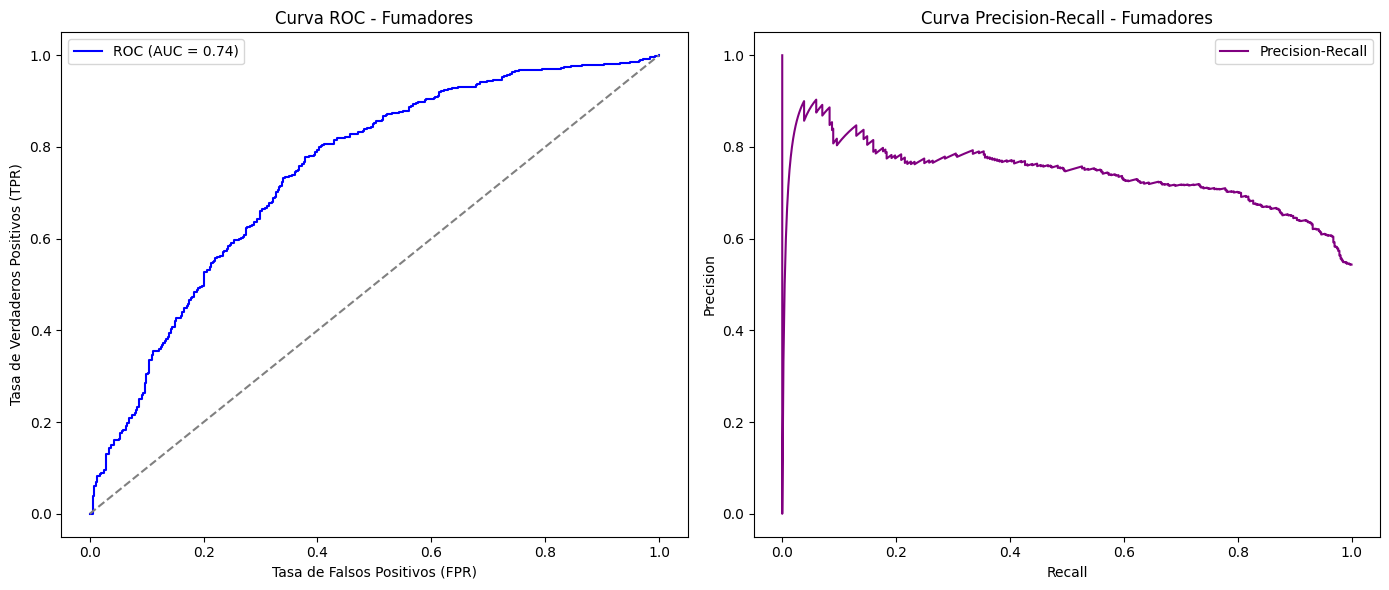


Resultados para No Fumadores (Regresión Logística):
Exactitud (accuracy): 0.76410998552822
Precisión (precision): 0.7190635451505016
Sensibilidad (recall): 0.7312925170068028
AUC-ROC: 0.8239260439692249


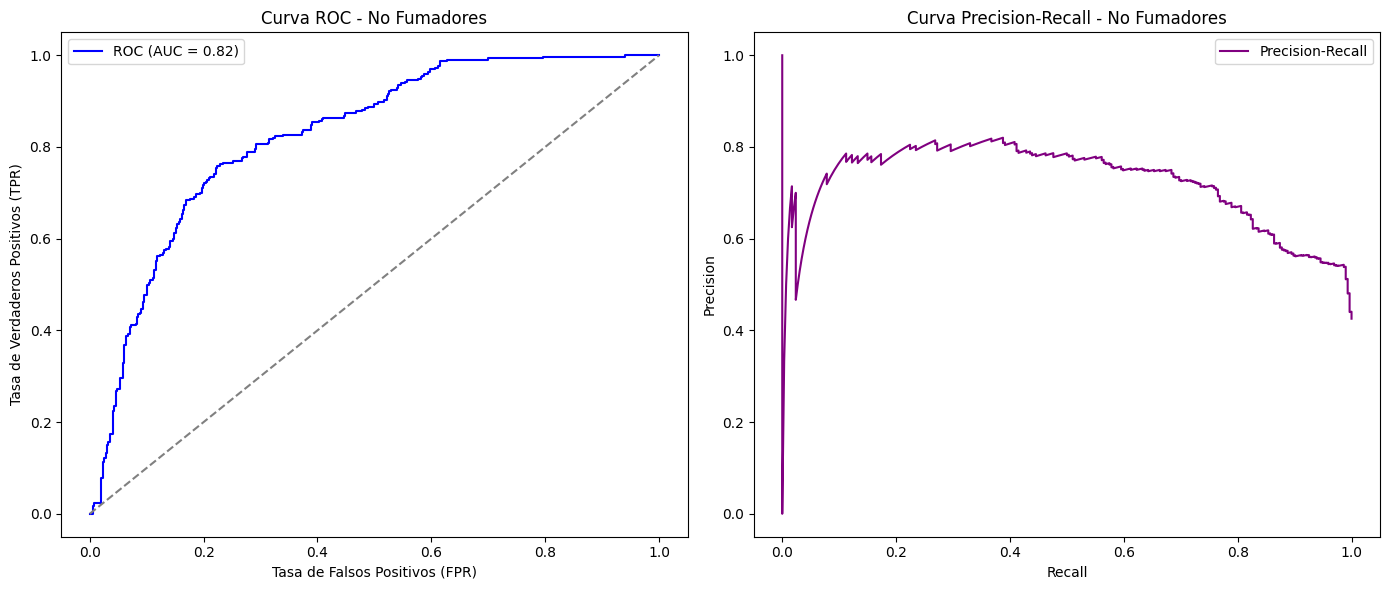

In [73]:
#10. Separa los modelos de regresión anteriores en dos distintos, respectivamente,
#considerando alguna variable categórica. Compara y concluye.

#a) Modelo de regresión Lineal:

import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Variables seleccionadas para el modelo de regresión lineal
variables_cuantitativas = ['age', 'heartRate', 'diaBP', 'BPMeds']
variables_cualitativas = ['sex_M', 'currentSmoker_Yes']

# Crear el DataFrame con las variables seleccionadas
df_model = data_clean[['BMI'] + variables_cuantitativas + variables_cualitativas]

# Dividir el DataFrame en hombres y mujeres
df_men = df_model[df_model['sex_M'] == 1].drop(columns=['sex_M'])
df_women = df_model[df_model['sex_M'] == 0].drop(columns=['sex_M'])

# Función para entrenar y evaluar el modelo de regresión lineal
def evaluate_linear_regression(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nResultados para {title} (Regresión Lineal):")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Coeficiente de Determinación (R²): {r2}")
    print("Coeficientes de las variables en el modelo:")
    print(pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente']))

# Evaluar modelo de regresión lineal para hombres
evaluate_linear_regression(df_men.drop(columns='BMI'), df_men['BMI'], "Hombres")

# Evaluar modelo de regresión lineal para mujeres
evaluate_linear_regression(df_women.drop(columns='BMI'), df_women['BMI'], "Mujeres")

# Variables seleccionadas para el modelo de regresión logística
X = data_clean.drop(columns=["TenYearCHD"])
y = data_clean['TenYearCHD']

# Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Crear DataFrames separados para fumadores y no fumadores
df_fumador = X_res[X_res['currentSmoker_Yes'] == 1].copy()
df_fumador['TenYearCHD'] = y_res[X_res['currentSmoker_Yes'] == 1]
df_no_fumador = X_res[X_res['currentSmoker_Yes'] == 0].copy()
df_no_fumador['TenYearCHD'] = y_res[X_res['currentSmoker_Yes'] == 0]

# Función para entrenar y evaluar el modelo de regresión logística con gráficos
def evaluate_logistic_regression(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Escalar las características
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Entrenar modelo de regresión logística
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Predicciones y probabilidades
    y_pred = log_reg.predict(X_test)
    y_proba = log_reg.predict_proba(X_test)[:, 1]

    # Métricas de evaluación
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    auc_roc = roc_auc_score(y_test, y_proba)

    print(f"\nResultados para {title} (Regresión Logística):")
    print(f"Exactitud (accuracy): {accuracy}")
    print(f"Precisión (precision): {precision}")
    print(f"Sensibilidad (recall): {recall}")
    print(f"AUC-ROC: {auc_roc}")

    # Configuración de gráficos en dos columnas
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    axes[0].plot(fpr, tpr, label=f'ROC (AUC = {auc_roc:.2f})', color='blue')
    axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[0].set_xlabel("Tasa de Falsos Positivos (FPR)")
    axes[0].set_ylabel("Tasa de Verdaderos Positivos (TPR)")
    axes[0].set_title(f"Curva ROC - {title}")
    axes[0].legend()

    # Curva Precision-Recall
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    axes[1].plot(recall_vals, precision_vals, label='Precision-Recall', color='purple')
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title(f"Curva Precision-Recall - {title}")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Evaluar modelo de regresión logística para fumadores
evaluate_logistic_regression(df_fumador.drop(columns=['TenYearCHD', 'currentSmoker_Yes']), df_fumador['TenYearCHD'], "Fumadores")

# Evaluar modelo de regresión logística para no fumadores
evaluate_logistic_regression(df_no_fumador.drop(columns=['TenYearCHD', 'currentSmoker_Yes']), df_no_fumador['TenYearCHD'], "No Fumadores")



--- 

### Interpretación de la Regresión Lineal para el BMI

---

### Resultados para Hombres

- **Error Cuadrático Medio (MSE)**: 9.33
  - Este MSE representa el promedio de los errores al cuadrado entre las predicciones y los valores reales del BMI en los hombres. Un valor más bajo de MSE sería ideal, pero este valor indica que el modelo no es particularmente preciso. Aún existe un margen considerable de error en las predicciones para los hombres.

- **Coeficiente de Determinación (R²)**: 0.13
  - Un R² de 0.13 significa que el modelo solo puede explicar el 13% de la variabilidad del BMI en los hombres. Esto es bastante bajo, lo cual me indica que las variables en este modelo no son suficientes para capturar las principales influencias sobre el BMI. Probablemente hay otros factores importantes que no están siendo considerados aquí.

- **Coeficientes de las Variables**:
  - **age**: Con un coeficiente de -0.014, parece que a medida que la edad aumenta, hay una ligera disminución en el BMI. Sin embargo, este efecto es muy pequeño, y no parece tener un impacto significativo.
  - **heartRate**: Un coeficiente de 0.005 sugiere que a mayor ritmo cardíaco, el BMI tiende a ser un poco mayor. Aunque positivo, este impacto es prácticamente insignificante.
  - **diaBP** (Presión Arterial Diastólica): Con un coeficiente de 0.10, parece haber una ligera relación positiva entre la presión diastólica y el BMI. Esto indica que a mayor presión diastólica, el BMI podría aumentar levemente.
  - **BPMeds** (Uso de Medicamentos para la Presión): Un coeficiente de 0.21 sugiere que aquellos hombres que toman medicamentos para la presión tienen, en promedio, un BMI un poco más alto.
  - **currentSmoker_Yes**: Con -0.84, parece que ser fumador está asociado con un BMI más bajo en hombres. Esto podría deberse a factores como cambios en el metabolismo o en los hábitos alimenticios de los fumadores.

---

### Resultados para Mujeres

- **Error Cuadrático Medio (MSE)**: 10.41
  - Al igual que en el modelo para hombres, este valor de MSE es alto, lo que indica que las predicciones del modelo para el BMI en mujeres no son muy precisas. Existe una cantidad notable de error en el modelo al predecir el BMI de las mujeres.

- **Coeficiente de Determinación (R²)**: 0.11
  - Un R² de 0.11 significa que solo el 11% de la variación en el BMI de las mujeres puede ser explicada por el modelo. Este valor bajo me señala que el modelo está lejos de capturar todos los factores que realmente influyen en el BMI de las mujeres.

- **Coeficientes de las Variables**:
  - **age**: Un coeficiente de 0.054 muestra una relación positiva, aunque muy leve, entre la edad y el BMI en mujeres. A medida que las mujeres envejecen, parece que el BMI podría aumentar ligeramente, pero este cambio es pequeño.
  - **heartRate**: Con un coeficiente de 0.006, el ritmo cardíaco tiene un efecto mínimo en el BMI. No parece ser una variable relevante para predecir el BMI en mujeres.
  - **diaBP** (Presión Arterial Diastólica): Con 0.09, la presión diastólica tiene una relación positiva con el BMI, pero el impacto sigue siendo bajo, al igual que en el modelo para hombres.
  - **BPMeds** (Uso de Medicamentos para la Presión): Con 0.58, este coeficiente indica que las mujeres que toman medicamentos para la presión tienen, en promedio, un BMI más alto. Este es uno de los efectos más fuertes en el grupo de mujeres.
  - **currentSmoker_Yes**: Con -1.24, ser fumadora está asociado con un BMI más bajo en mujeres, un efecto similar al observado en hombres, pero un poco más fuerte en mujeres.


---

### Conclusión General

- **Ser fumador** tiende a estar asociado con un BMI más bajo tanto en hombres como en mujeres.
- **El uso de medicamentos para la presión arterial** parece relacionarse con un BMI más alto, especialmente en mujeres.



# Regresion logistica 

---

### Resultados para Fumadores

- **Exactitud (Accuracy)**: 0.70
  - La exactitud muestra que el modelo acertó en el 70% de los casos al predecir el riesgo de enfermedad coronaria entre los fumadores.
  
- **Precisión (Precision)**: 0.69
  - Esto indica que, de todas las veces que el modelo predijo que un fumador tiene riesgo de enfermedad coronaria, el 69% de esas predicciones fueron correctas.
  
- **Sensibilidad (Recall)**: 0.82
  - La sensibilidad es bastante alta, lo que significa que el modelo identificó correctamente el 82% de los casos en los que realmente había riesgo.

- **AUC-ROC**: 0.74
  - Un AUC de 0.74 indica que el modelo tiene un buen desempeño discriminando entre fumadores con y sin riesgo de enfermedad coronaria.

#### Gráficos
- **Curva ROC**: La curva muestra una capacidad decente para diferenciar entre los que tienen y los que no tienen riesgo, con un área bajo la curva (AUC) de 0.74.
- **Curva Precision-Recall**: Esta curva también es bastante consistente, lo que demuestra una precisión alta en los primeros rangos de recall.

---

### Resultados para No Fumadores

- **Exactitud (Accuracy)**: 0.76
  - El modelo alcanzó una exactitud del 76% entre los no fumadores, lo que indica un buen nivel de predicción.

- **Precisión (Precision)**: 0.72
  - La precisión para no fumadores es del 72%, lo que sugiere que el modelo es bastante confiable cuando predice que un no fumador tiene riesgo.

- **Sensibilidad (Recall)**: 0.73
  - Con una sensibilidad del 73%, el modelo identificó correctamente el riesgo en la mayoría de los casos entre no fumadores.

- **AUC-ROC**: 0.82
  - Un AUC de 0.82 es mayor que el de los fumadores, lo que sugiere que el modelo discrimina aún mejor en este grupo.

#### Gráficos
- **Curva ROC**: La curva ROC para no fumadores es más alta, con un AUC de 0.82, indicando un buen rendimiento en la clasificación.
- **Curva Precision-Recall**: La curva Precision-Recall para no fumadores es sólida, reflejando una consistencia en precisión y recall en los primeros rangos.

---

### Conclusión Comparativa

En general, el modelo de regresión logística para predecir el riesgo de enfermedad coronaria muestra un mejor rendimiento entre los no fumadores que entre los fumadores. La exactitud, precisión y sensibilidad son ligeramente superiores en el grupo de no fumadores, y el AUC-ROC confirma que el modelo discrimina mejor en este grupo.